Import Libraries and methods and classes

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Read the Data

In [2]:
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,...,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Split the dataset into images and lables

In [8]:
x = data.drop('0',axis=1)

In [9]:
y = data['0']

In [11]:
print(x.shape, y.shape)

(372450, 784) (372450,)


In this segment, we are splitting the data into training & testing dataset using train_test_split().
Also, we are reshaping the train & test image data so that they can be displayed as an image, as initially in the CSV file they were present as 784 columns of pixel data. So we convert it to 28×28 pixels.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
print("training data shape before reshaping:", x_train.shape)
print("testing data shape before reshaping:", x_test.shape)

x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("training data shape after reshaping:", x_train.shape)
print("testing data shape after reshaping:", x_test.shape)

training data shape before reshaping: (297960, 784)
testing data shape before reshaping: (74490, 784)
training data shape after reshaping: (297960, 28, 28)
testing data shape after reshaping: (74490, 28, 28)


All the labels are present in the form of floating point values, that we convert to integer values, & so we create a dictionary word_dict to map the integer values with the characters.

In [14]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

## Plotting the number of alphabets in the dataset

* Here we are only describing the distribution of the alphabets.
* Firstly we convert the labels into integer values and append into the count list according to the label. This count list has the number of images present in the dataset belonging to each alphabet.
* Now we create a list – alphabets containing all the characters using the values() function of the dictionary.
* Now using the count & alphabets lists we draw the horizontal bar plot.

In [15]:
y_init = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_init:
    count[i] += 1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

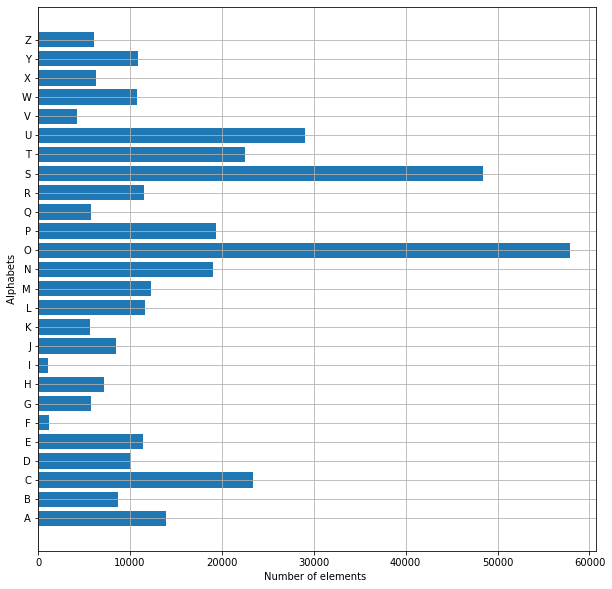

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel(" Alphabets ")
plt.grid()
plt.show()

## shuffling the data

* Now we shuffle some of the images of the train set.
* The shuffling is done using the shuffle() function so that we can display some random images.
* We then create 9 plots in 3×3 shape & display the thresholded images of 9 alphabets.

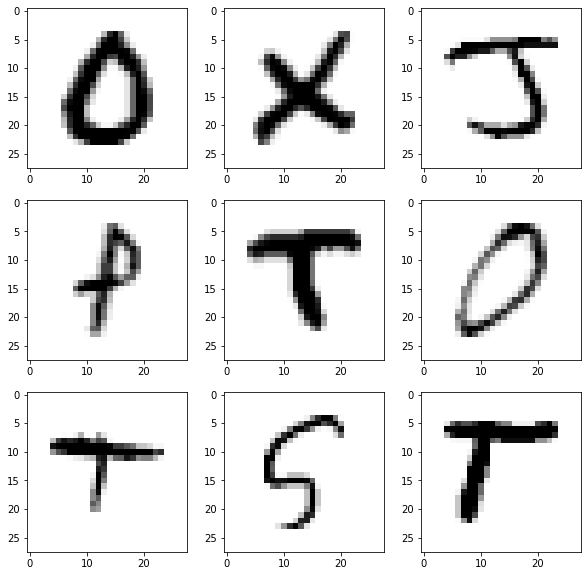

In [18]:
shuff = shuffle(x_train[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

## Data Reshaping
Reshaping the training & test dataset so that it can be put in the model

In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data: ", x_train.shape)

New shape of train data:  (297960, 28, 28, 1)


In [21]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data: ", x_test.shape)

New shape of test data:  (74490, 28, 28, 1)


Here we convert the single float values to categorical values. This is done as the CNN model takes input of labels & generates the output as a vector of probabilities.

In [22]:
y_train = to_categorical(y_train, num_classes=26, dtype='int')
print("New shape of train lables: ", y_train.shape)

y_test = to_categorical(y_test, num_classes=26, dtype='int')
print("New shape of test labels: ", y_test.shape)

New shape of train lables:  (297960, 26)
New shape of test labels:  (74490, 26)


## Creating the model

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

## Compiling & Fitting Model

* Here we are compiling the model, where we define the optimizing function & the loss function to be used for fitting.
* The optimizing function used is Adam, that is a combination of RMSprop & Adagram optimizing algorithms.
* The dataset is very large so we are training for only a single epoch, however, as required we can even train it for multiple epochs (which is recommended for character recognition for better accuracy).

In [26]:
model.compile(optimizer= Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

9312/9312 [==============================] - 310s 33ms/step - loss: 0.1586 - accuracy: 0.9577 - val_loss: 0.0790 - val_accuracy: 0.9778


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)              

In [28]:
model.save(r'model.h5')

In [31]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9778493642807007]
The training accuracy is : [0.9576822519302368]
The validation loss is : [0.07896795868873596]
The training loss is : [0.1585524082183838]


## Doing Some Predictions on Test Data

Here we are creating 9 subplots of (3,3) shape & visualize some of the test dataset alphabets along with their predictions, that are made using the model.predict() function for text recognition.

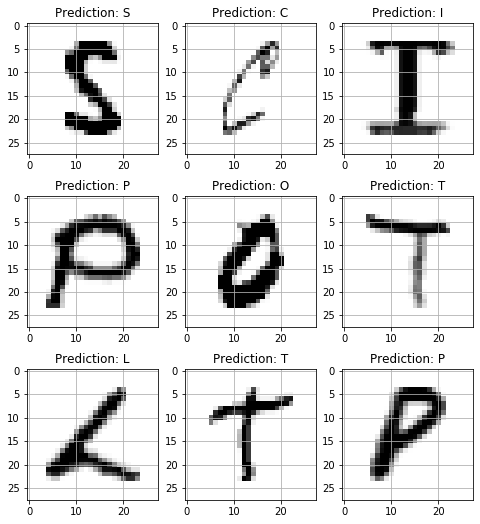

In [35]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(x_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(y_test[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

## Doing Prediction on External Image

* Here we have read an external image that is originally an image of alphabet ‘B’ and made a copy of it that is to go through some processing to be fed to the model for the prediction that we will see in a while.
* The img read is then converted from BGR representation (as OpenCV reads the image in BGR format) to RGB for displaying the image, & is resized to our required dimensions that we want to display the image in.

In [38]:
img = cv2.imread(r'img_a.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400, 440))

* Now we do some processing on the copied image (img_copy).
* We convert the image from BGR to grayscale and apply thresholding to it. We don’t need to apply a threshold we could use the grayscale to predict, but we do it to keep the image smooth without any sort of hazy gray colors in the image that could lead to wrong predictions.
* The image is to be then resized using cv2.resize() function into the dimensions that the model takes as input, along with reshaping the image using np.reshape() so that it can be used as model input.

In [39]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [ ]:
* Now we make a prediction using the processed image & use the np.argmax() function to get the index of the class with the highest predicted probability. Using this we get to know the exact character through the word_dict dictionary.
* This predicted character is then displayed on the frame.

In [40]:
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)